In [34]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [10]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)

In [35]:
from indexparameter import *
import h5py

fname = '/reg/d/psdm/cxi/cxic0415/res/autosfx/indexcrystfel/info/cxic0415_0100_00.h5'
f = h5py.File(fname,'r')
X = f['lattice'][1:,:]
f.close()
print X
numIndexed = X.shape[0]
print numIndexed

[[   5.11926985    5.31700993    9.93801975   90.1697998    90.0689621
    67.58747101]
 [   5.14059019    9.83574963    5.30084991   89.15335846  113.38453674
    89.21681213]
 [   5.2081399     5.97470999    9.12707996   93.18042755   87.64024353
    62.8771286 ]
 ..., 
 [   5.10516024    9.94207001    5.29536009   90.05506897  112.83065796
    90.01434326]
 [   5.10527992    9.85682964    5.32719994   90.4418869   112.4562912
    89.81197357]
 [   5.46820021    9.75442982    9.57728004   91.67993164   96.8390274
    89.66072083]]
299


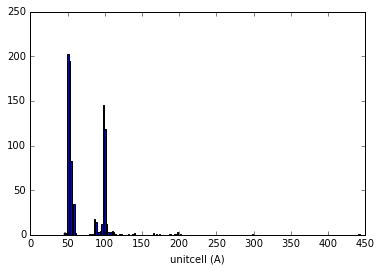

In [36]:
uc = X[:,:3].flatten()
uc *= 10.
plt.hist(uc,200)
plt.xlabel('unitcell (A)')
plt.show()

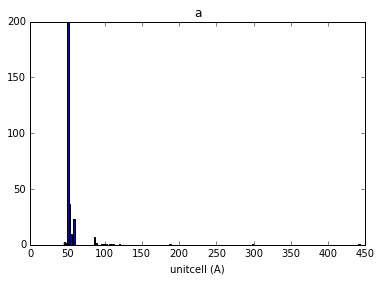

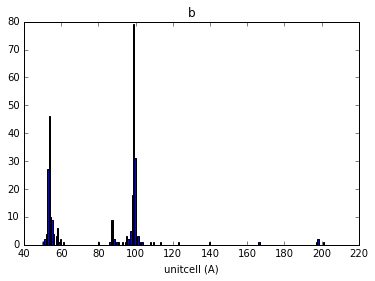

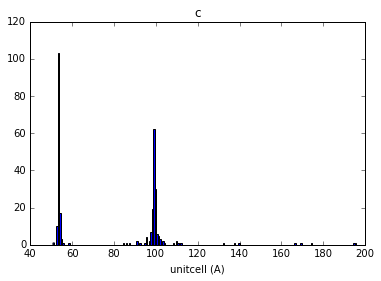

In [37]:
#plt.subplot(311)
plt.hist(X[:,0].flatten()*10.,200)
plt.xlabel('unitcell (A)')
plt.title('a')
plt.show()
#plt.subplot(312)
plt.hist(X[:,1].flatten()*10.,200)
plt.xlabel('unitcell (A)')
plt.title('b')
plt.show()
#plt.subplot(313)
plt.hist(X[:,2].flatten()*10.,200)
plt.xlabel('unitcell (A)')
plt.title('c')
plt.show()

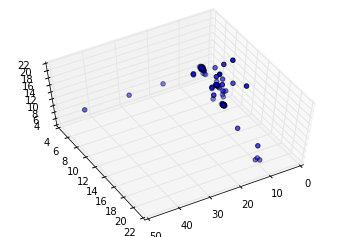

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
ax.view_init(60, 60)
plt.show()

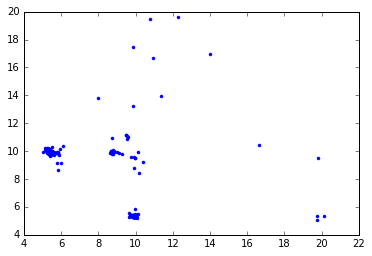

In [47]:
plt.plot(X[:,1],X[:,2],'.')
plt.show()

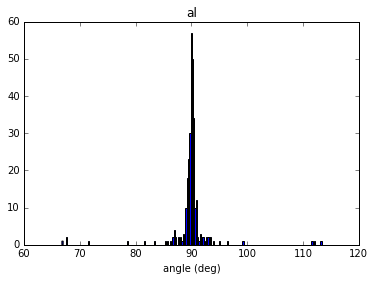

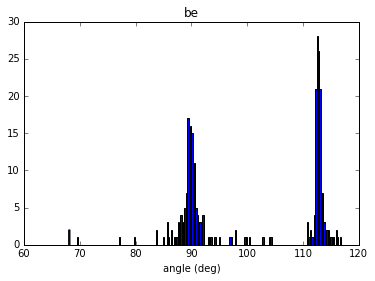

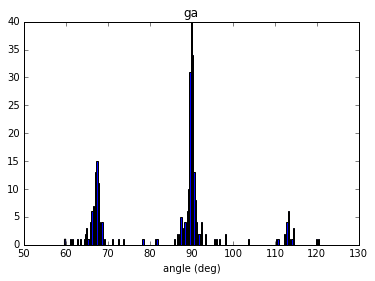

In [39]:
#plt.subplot(311)
plt.hist(X[:,3].flatten(),200)
plt.xlabel('angle (deg)')
plt.title('al')
plt.show()
#plt.subplot(312)
plt.hist(X[:,4].flatten(),200)
plt.xlabel('angle (deg)')
plt.title('be')
plt.show()
#plt.subplot(313)
plt.hist(X[:,5].flatten(),200)
plt.xlabel('angle (deg)')
plt.title('ga')
plt.show()

In [40]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X[:,:3]*10)
print db
print db.labels_
print db.core_sample_indices_

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    min_samples=10, n_jobs=1, p=None)
[-1 -1 -1 -1 -1  0 -1  1  0  0 -1  0  1 -1 -1 -1 -1  1 -1 -1  0 -1 -1 -1  0
  0  0 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1  0 -1 -1 -1 -1  0  1  0 -1 -1  0  0
 -1 -1 -1  0  0  0 -1  0 -1  0 -1 -1  0 -1 -1  0 -1  1  0 -1  0  0 -1 -1  0
 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0 -1 -1  0 -1  1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0  0  1  0 -1  0 -1 -1
 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  0 -1 -1  0  0  0 -1  0 -1 -1 -1  0  1 -1 -1 -1  0 -1 -1 -1
  0 -1  0  0 -1 -1 -1  0 -1 -1  0  0  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1  0  0  0  0 -1 -1  0 -1 -1  0  0 -1  0  0 -1 -1 -1  0  0 -1  0  0
 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1  0  0 -1 -1  0 -1  0 -1 

In [41]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [42]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2


NameError: name 'labels_true' is not defined

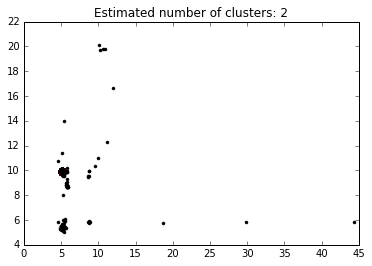

In [43]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [1]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [ ]:
from scipy.optimize import curve_fit
x = np.arange(0, 21., 0.2)
y = [s]

sum:  13.7927138249 1.0


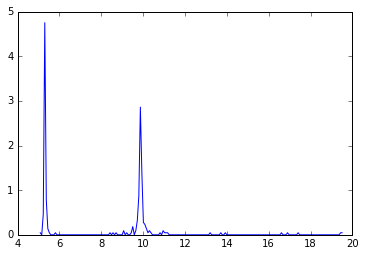

In [33]:
hist, bin_edges = np.histogram(X[:,2], bins=200, density=True)
#print "hist: ", hist
#print "edge: ", bin_edges
print "sum: ", hist.sum(), np.sum(hist * np.diff(bin_edges))
plt.plot(bin_edges[:-1], hist)
#plt.hist(hist, bins=200)#, bins='auto')
plt.show()

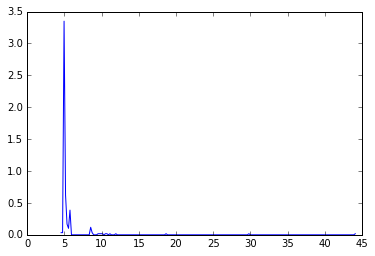